In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ti


# /kaggle/input/titanic/train.csv
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)
titanic_train, titanic_dev = train_test_split(titanic, test_size=0.2, stratify=titanic["Survived"], random_state=42)
titanic_test = pd.read_csv("/kaggle/input/titanic/test.csv")
gender_submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# A glance at the training dataframe

In [2]:
titanic_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,1,3,male,NaN,0,0,56.4958,S
481,0,2,male,NaN,0,0,0.0000,S
527,0,1,male,NaN,0,0,221.7792,S
855,1,3,female,18.0,0,1,9.3500,S
801,1,2,female,31.0,1,1,26.2500,S
652,0,3,male,21.0,0,0,8.4333,S
509,1,3,male,26.0,0,0,56.4958,S
557,0,1,male,NaN,0,0,227.5250,C
828,1,3,male,NaN,0,0,7.7500,Q
18,0,3,female,31.0,1,0,18.0000,S


In [3]:
print(titanic_train.shape)
print(titanic_dev.shape)
print(titanic_test.shape)

(712, 8)
(179, 8)
(418, 11)


In [4]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       575 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  710 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [5]:
# "Age" and "Embarked" have Null values

titanic_train["Embarked"].isna().sum()

2

In [6]:
titanic_train.loc[titanic_train["Embarked"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
829,1,1,female,62.0,0,0,80.0,NaN
61,1,1,female,38.0,0,0,80.0,NaN


In [7]:
titanic_train["Embarked"].value_counts()

Embarked
S    516
C    139
Q     55
Name: count, dtype: int64

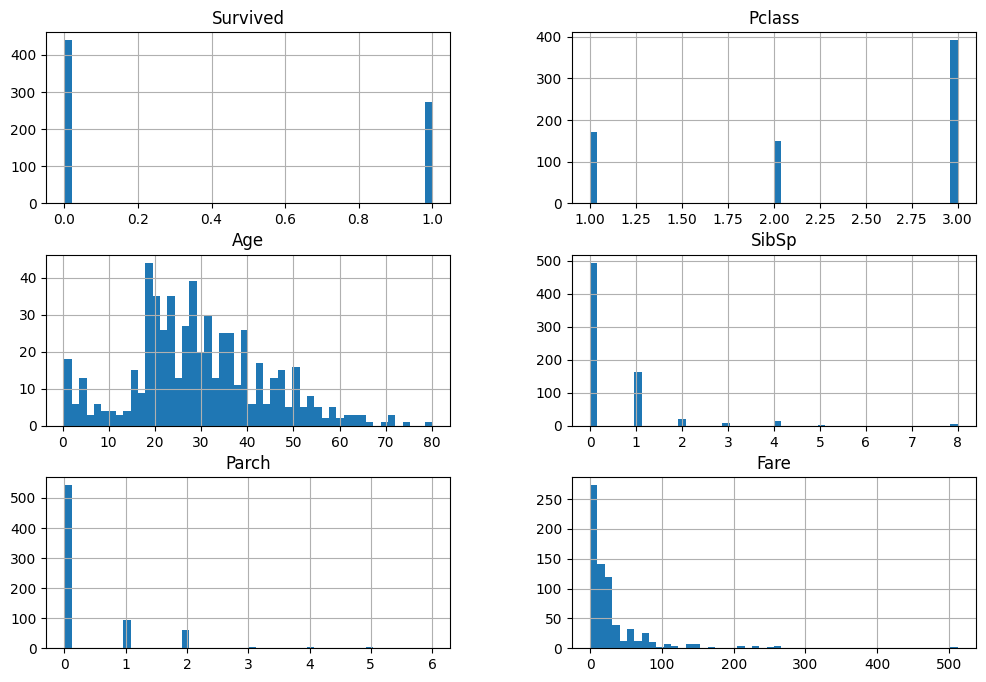

In [8]:
titanic_train.hist(bins=50, figsize=(12,8))
plt.show()

In [9]:
features = ["Survived","Sex", "Age", "Pclass", "SibSp", "Parch", "Fare"]
corr_matrix = titanic_train[features].corr(numeric_only=True)
# corr_matrix = titanic_train.corr()
corr_matrix

,Survived,Age,Pclass,SibSp,Parch,Fare
Survived,1.000000,-0.084268,-0.348007,-0.026115,0.084178,0.275499
Age,-0.084268,1.000000,-0.351089,-0.312885,-0.175573,0.106915
Pclass,-0.348007,-0.351089,1.000000,0.097900,0.040467,-0.556540
SibSp,-0.026115,-0.312885,0.097900,1.000000,0.392269,0.127011
Parch,0.084178,-0.175573,0.040467,0.392269,1.000000,0.177235
Fare,0.275499,0.106915,-0.556540,0.127011,0.177235,1.000000


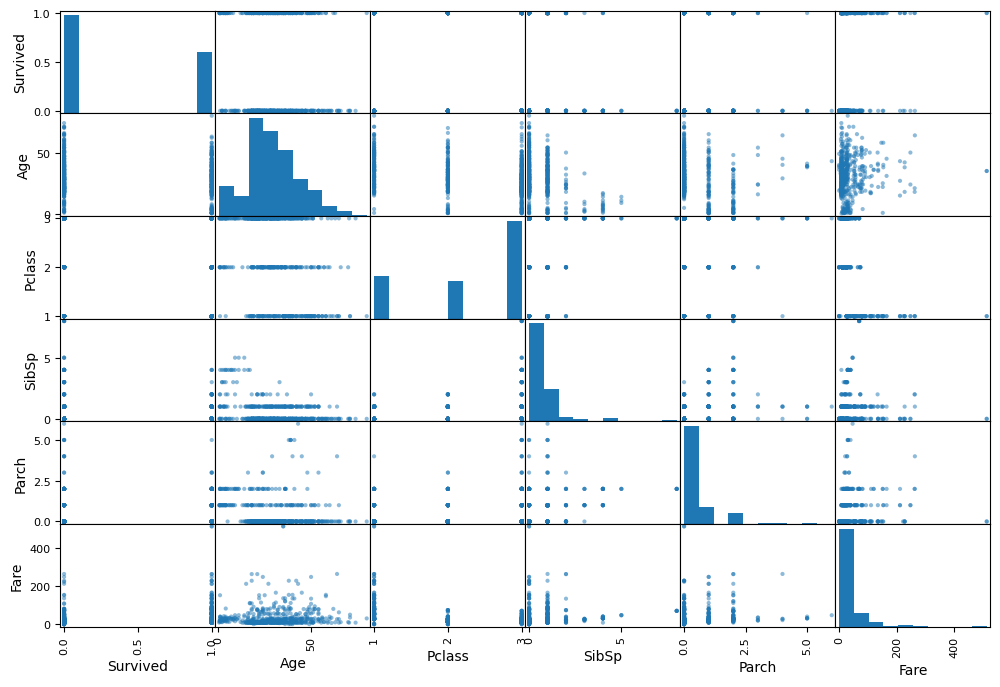

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic_train[features], figsize=(12, 8))
plt.show()

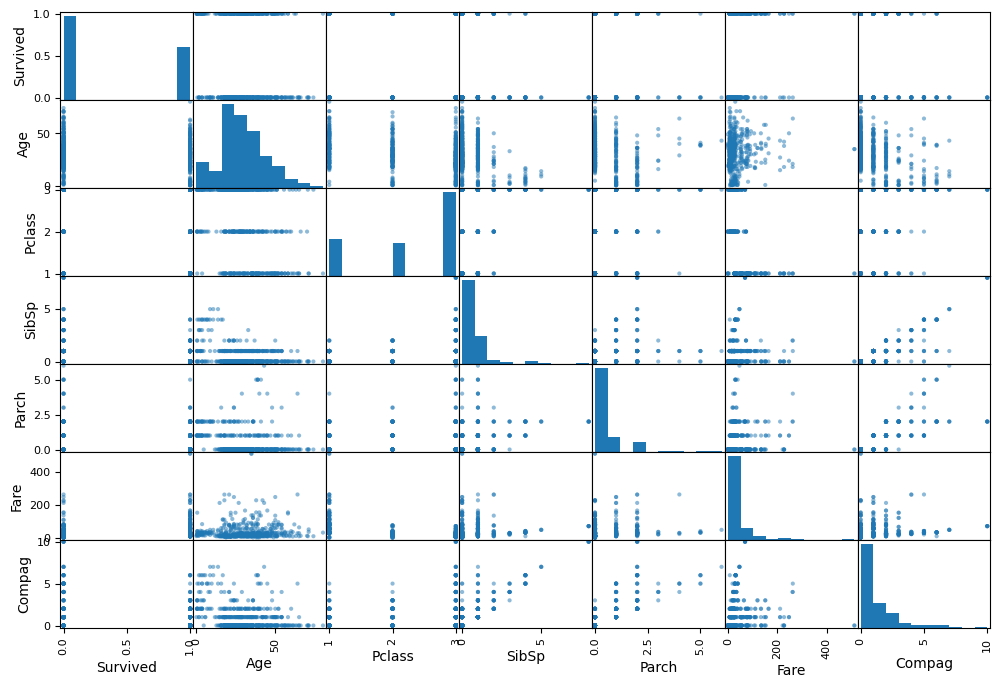

In [11]:
titanic_train["Compag"] = titanic_train["SibSp"] + titanic_train["Parch"]
features.append("Compag")
features
scatter_matrix(titanic_train[features], figsize=(12, 8))
plt.show()

# Handling missing values

In [12]:
print(titanic_train[titanic_train["Sex"] == "male"]["Age"].median())
print(titanic_train[titanic_train["Sex"] == "female"]["Age"].median())

29.0
28.0


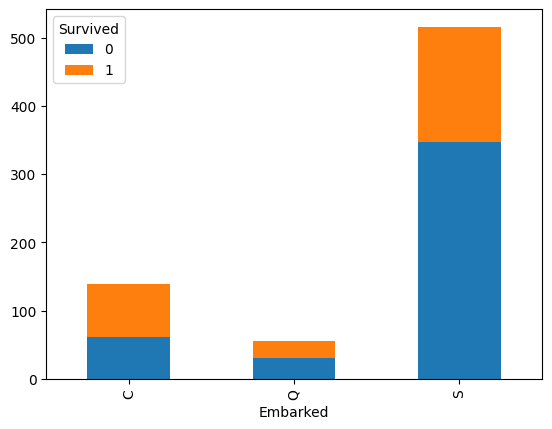

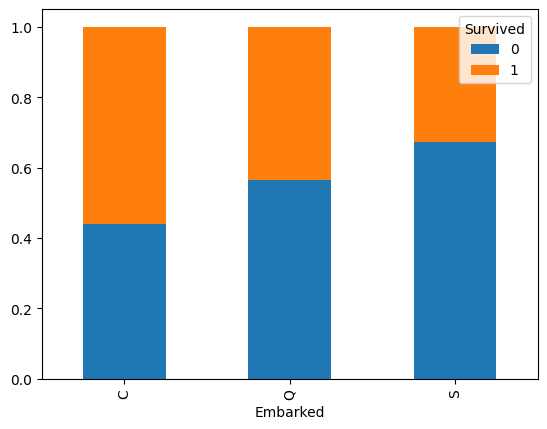

In [13]:
ct = pd.crosstab(titanic_train["Embarked"], titanic_train["Survived"])
ct.plot(kind="bar", stacked=True)
ctnorm = ct.div(ct.sum(1), axis=0)
ctnorm.plot(kind="bar", stacked=True)
plt.show()

In [14]:
titanic_train.drop("Embarked", axis=1, inplace=True)

In [15]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       575 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Compag    712 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 50.1+ KB


In [16]:
from sklearn.impute import SimpleImputer
# imp_median_male = SimpleImputer(missing_values=np.nan, strategy="median")
# imp_median_female = SimpleImputer(missing_values=np.nan, strategy="median")

# imp_median_male.fit(titanic_train[titanic_train["Sex"] == "male"]["Age"].values.reshape(-1,1))
# imp_median_female.fit(titanic_train[titanic_train["Sex"] == "female"]["Age"].values.reshape(-1,1))

imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
imp_median.fit(titanic_train["Age"].values.reshape(-1,1))
titanic_train["Age"] = imp_median.transform(titanic_train["Age"].values.reshape(-1,1))

In [17]:
titanic_train.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Compag
692,1,3,male,28.5,0,0,56.4958,0
481,0,2,male,28.5,0,0,0.0000,0
527,0,1,male,28.5,0,0,221.7792,0
855,1,3,female,18.0,0,1,9.3500,1
801,1,2,female,31.0,1,1,26.2500,2
652,0,3,male,21.0,0,0,8.4333,0
509,1,3,male,26.0,0,0,56.4958,0
557,0,1,male,28.5,0,0,227.5250,0
828,1,3,male,28.5,0,0,7.7500,0
18,0,3,female,31.0,1,0,18.0000,1


# Exploratory Data Analysis (EDA)

Survived    0    1
Pclass            
1          60  111
2          83   67
3         296   95


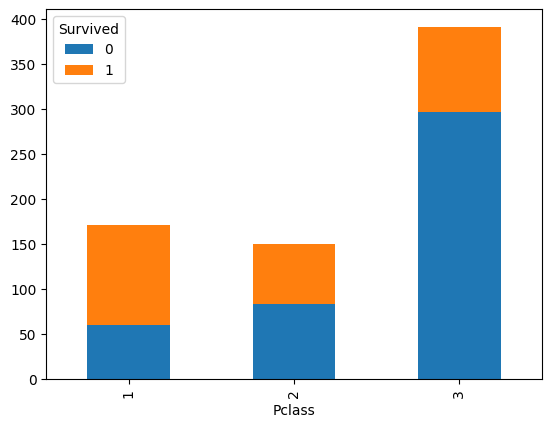

In [18]:
crosstab_01 = pd.crosstab(titanic_train["Pclass"], titanic_train["Survived"])
print(crosstab_01)
crosstab_01.plot(kind="bar", stacked=True)
plt.show()

Survived         0         1
Pclass                      
1         0.350877  0.649123
2         0.553333  0.446667
3         0.757033  0.242967


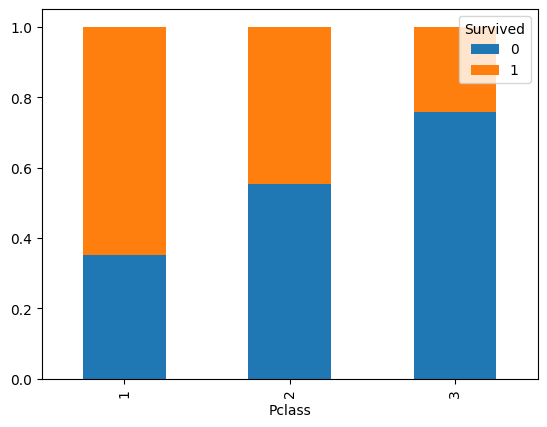

In [19]:
crosstab_01_norm = crosstab_01.div(crosstab_01.sum(1), axis=0)
print(crosstab_01_norm)
crosstab_01_norm.plot(kind="bar", stacked=True)
plt.show()

Survived  0  1
Age           
0.42      0  1
0.67      0  1
0.75      0  1
0.83      0  2
0.92      0  1
...      .. ..
70.00     1  0
70.50     1  0
71.00     2  0
74.00     1  0
80.00     0  1

[85 rows x 2 columns]


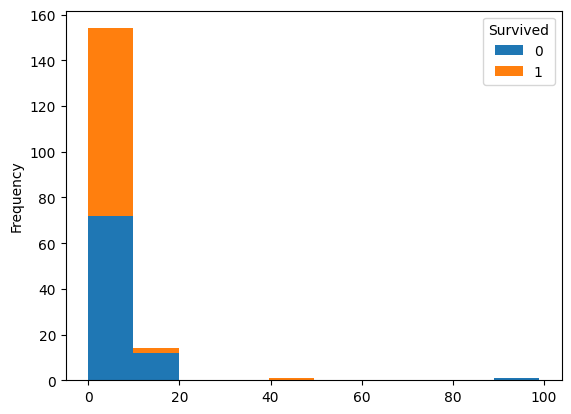

In [20]:
crosstab_Age = pd.crosstab(titanic_train["Age"], titanic_train["Survived"])
print(crosstab_Age)
crosstab_Age.plot(kind="hist", stacked=True)
# crosstab_Age_norm = crosstab_Age.div(crosstab_Age.sum(1), axis=0)
# print(crosstab_Age_norm)
# crosstab_Age_norm.plot(kind="bar", stacked=True)
plt.show()

In [21]:
print(titanic_train["Age"].min(), titanic_train["Age"].max())
titanic_train["Agebin"] = pd.cut(x = titanic_train["Age"],
#                                  bins = [0, 20.01, 40.01, 60.01, 100],
#                                  labels = ["(0,20]", "(20,40]", "(40,60]", "(60,100)"])
                                 bins = [0, 10.01, 20.01, 30.01, 40.01, 50.01, 60.01, 100.0],
                                 labels = ["(0,10]", "(10,20]", "(20,30]", "(30,40]", "(40,50]", "(50,60]", "(60,100)"])
#                                  bins = [0, 15.01, 30.01, 45.01, 60.01, 75.01, 100],
#                                  labels = ["(0,15]", "(15,30]", "(30,45]", "(45,60]", "(60,75]", "(75,100)"])

0.42 80.0


Survived    0    1
Agebin            
(0,10]     20   32
(10,20]    56   34
(20,30]   215  103
(30,40]    73   58
(40,50]    40   31
(50,60]    22   12
(60,100)   13    3
Survived         0         1
Agebin                      
(0,10]    0.384615  0.615385
(10,20]   0.622222  0.377778
(20,30]   0.676101  0.323899
(30,40]   0.557252  0.442748
(40,50]   0.563380  0.436620
(50,60]   0.647059  0.352941
(60,100)  0.812500  0.187500


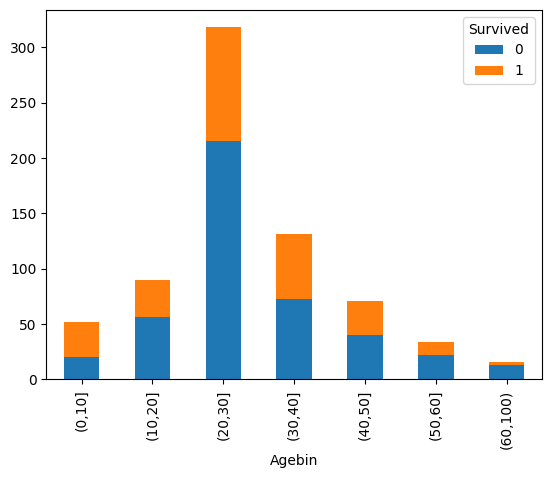

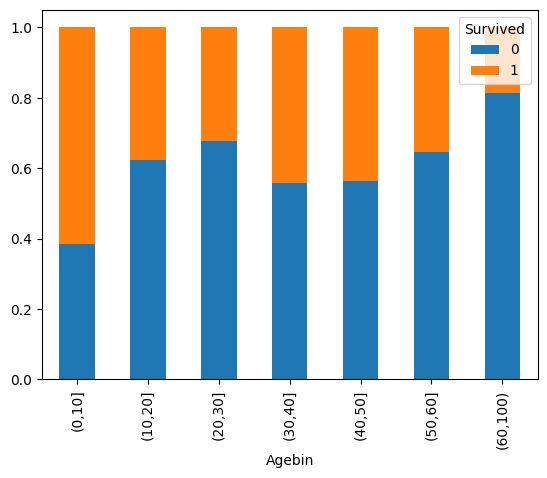

In [22]:
crosstab_Agebin = pd.crosstab(titanic_train["Agebin"], titanic_train["Survived"])
print(crosstab_Agebin)
crosstab_Agebin.plot(kind="bar", stacked=True)
crosstab_Agebin_norm = crosstab_Agebin.div(crosstab_Agebin.sum(1), axis=0)
print(crosstab_Agebin_norm)
crosstab_Agebin_norm.plot(kind="bar", stacked=True)
plt.show()

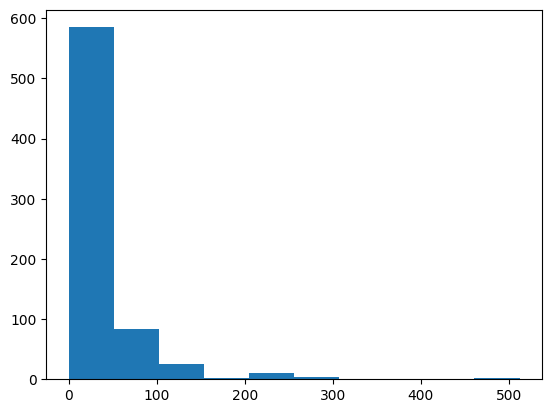

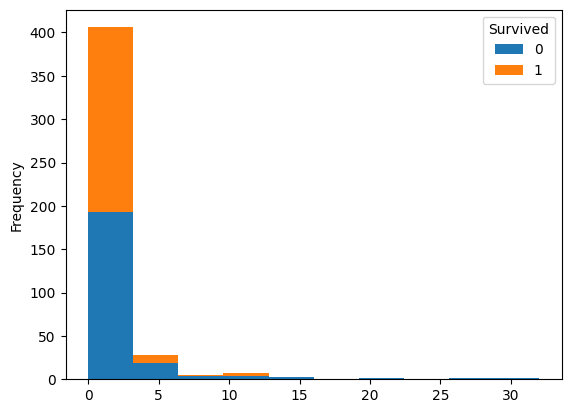

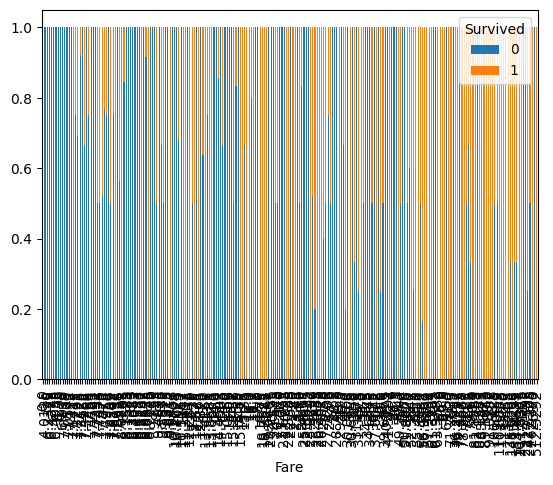

In [23]:
# crosstab_Fare = pd.crosstab(titanic_train["Fare"], titanic_train["Survived"])
# crosstab_Fare_norm = crosstab_Fare.div(crosstab_Fare.sum(1), axis=0)
# crosstab_Fare.plot(kind="hist", stacked=True)
# crosstab_Fare_norm.plot(kind="bar", stacked=True)
plt.hist(titanic_train["Fare"])
plt.show()
crosstab_Fare = pd.crosstab(titanic_train["Fare"], titanic_train["Survived"])
crosstab_Fare_norm = crosstab_Fare.div(crosstab_Fare.sum(1), axis=0)
crosstab_Fare.plot(kind="hist", stacked=True)
crosstab_Fare_norm.plot(kind="bar", stacked=True)
plt.show()

0.0
512.3292
Survived     0    1
Farebin            
(0,25]     323  124
(25,50]     79   58
(50,75]     20   31
(75,100]     7   27
(100,150]    3   17
(150,600)    7   16
Survived          0         1
Farebin                      
(0,25]     0.722595  0.277405
(25,50]    0.576642  0.423358
(50,75]    0.392157  0.607843
(75,100]   0.205882  0.794118
(100,150]  0.150000  0.850000
(150,600)  0.304348  0.695652


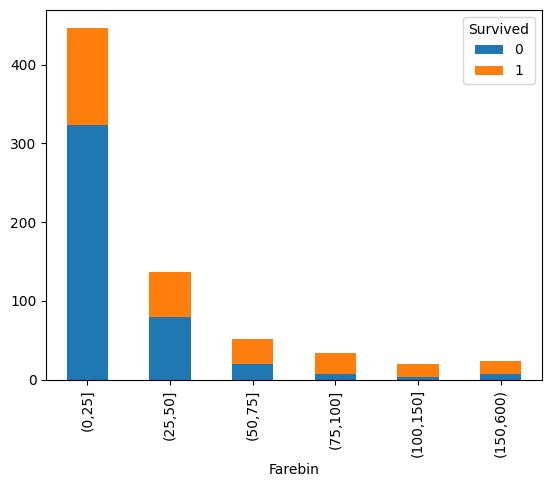

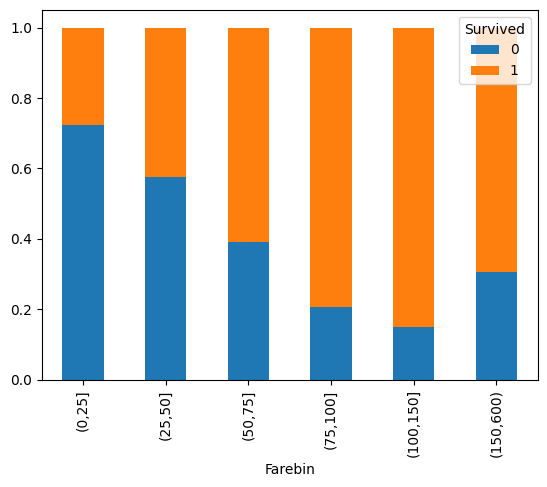

In [24]:
print(titanic_train["Fare"].min())
print(titanic_train["Fare"].max())

titanic_train["Farebin"] = pd.cut(x = titanic_train["Fare"],
                                 bins = [-0.01, 25.01, 50.01, 75.01, 100.01, 150.01, 600.0],
                                 labels = ["(0,25]", "(25,50]","(50,75]", "(75,100]", "(100,150]", "(150,600)"])
#                                  bins = [0, 50.01, 150.01, 600.0],
#                                  labels = ["(0,50]", "(50,150]", "(150,600)"])
#                                  bins = [0, 50.01, 100.01, 300.01, 600.0],
#                                  labels = ["(0,50]", "(50,100]", "(100,300]", "(300,600)"])

crosstab_Farebin = pd.crosstab(titanic_train["Farebin"], titanic_train["Survived"])
crosstab_Farebin_norm = crosstab_Farebin.div(crosstab_Farebin.sum(1), axis=0)
print(crosstab_Farebin)
print(crosstab_Farebin_norm)
crosstab_Farebin.plot(kind="bar", stacked=True)
crosstab_Farebin_norm.plot(kind="bar", stacked=True)
plt.show()

In [25]:
crosstab_Farebin, crosstab_Farebin_norm

(Survived     0    1
 Farebin            
 (0,25]     323  124
 (25,50]     79   58
 (50,75]     20   31
 (75,100]     7   27
 (100,150]    3   17
 (150,600)    7   16,
 Survived          0         1
 Farebin                      
 (0,25]     0.722595  0.277405
 (25,50]    0.576642  0.423358
 (50,75]    0.392157  0.607843
 (75,100]   0.205882  0.794118
 (100,150]  0.150000  0.850000
 (150,600)  0.304348  0.695652)

In [26]:
titanic_train.loc[titanic_train["Farebin"].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Compag,Agebin,Farebin


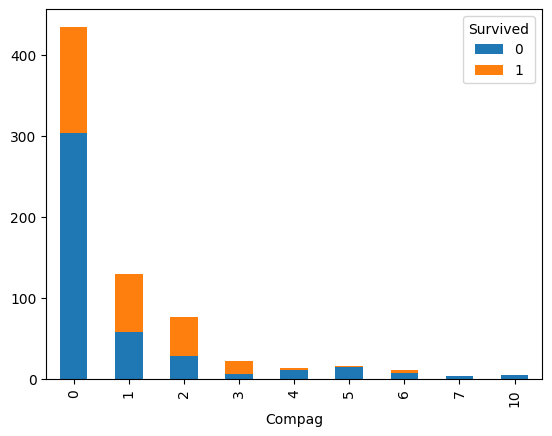

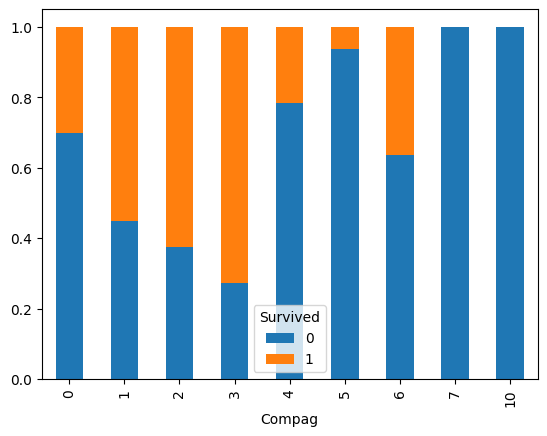

Survived,0,1
Compag,,
0,304,130
1,58,71
2,29,48
3,6,16
4,11,3
5,15,1
6,7,4
7,4,0
10,5,0


In [27]:
crosstab_Compag = pd.crosstab(titanic_train["Compag"], titanic_train["Survived"])
crosstab_Compag_norm = crosstab_Compag.div(crosstab_Compag.sum(1), axis=0)
crosstab_Compag.plot(kind="bar", stacked=True)
crosstab_Compag_norm.plot(kind="bar", stacked=True)
plt.show()
crosstab_Compag

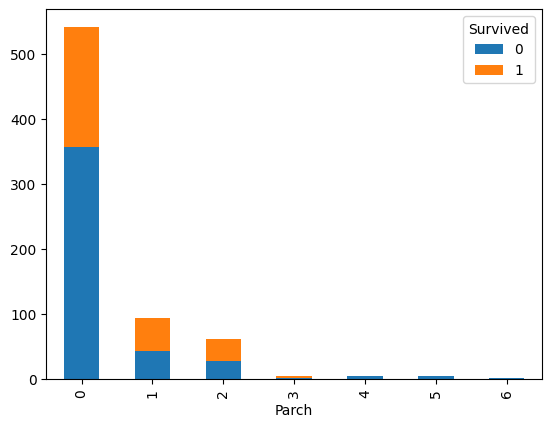

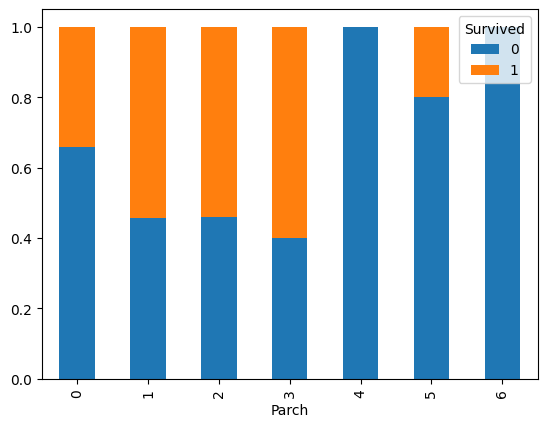

In [28]:
crosstab_Parch = pd.crosstab(titanic_train["Parch"], titanic_train["Survived"])
crosstab_Parch_norm = crosstab_Parch.div(crosstab_Parch.sum(1), axis=0)
crosstab_Parch.plot(kind="bar", stacked=True)
crosstab_Parch_norm.plot(kind="bar", stacked=True)
plt.show()

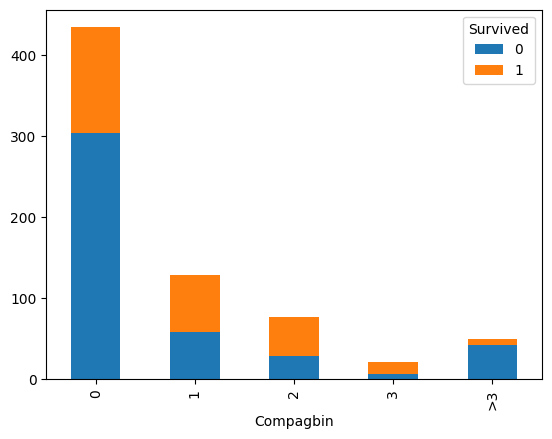

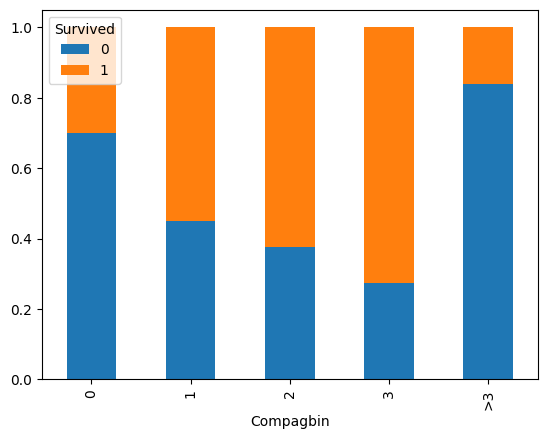

Survived,0,1
Compagbin,,
0,304,130
1,58,71
2,29,48
3,6,16
>3,42,8


In [29]:
titanic_train["Compagbin"] = pd.cut(x = titanic_train["Compag"],bins = [-1, 0, 1, 2, 3, 20], labels = ["0", "1", "2", "3", ">3"])
titanic_train
crosstab_Compagbin = pd.crosstab(titanic_train["Compagbin"], titanic_train["Survived"])
crosstab_Compagbin_norm = crosstab_Compagbin.div(crosstab_Compagbin.sum(1), axis=0)
crosstab_Compagbin.plot(kind="bar", stacked=True)
crosstab_Compagbin_norm.plot(kind="bar", stacked=True)
plt.show()
crosstab_Compagbin

In [30]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 692 to 507
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   712 non-null    int64   
 1   Pclass     712 non-null    int64   
 2   Sex        712 non-null    object  
 3   Age        712 non-null    float64 
 4   SibSp      712 non-null    int64   
 5   Parch      712 non-null    int64   
 6   Fare       712 non-null    float64 
 7   Compag     712 non-null    int64   
 8   Agebin     712 non-null    category
 9   Farebin    712 non-null    category
 10  Compagbin  712 non-null    category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 52.9+ KB


# Handling Categorial Features

In [31]:
# titanic_train["Pclass"] = titanic_train["Pclass"].astype("category")
titanic_train_prepared = titanic_train.drop(["Age", "SibSp", "Parch", "Fare", "Compag"], axis=1)
titanic_train_encoded = pd.get_dummies(titanic_train_prepared)

In [32]:
titanic_train_encoded.head(20)

,Survived,Pclass,Sex_female,Sex_male,"Agebin_(0,10]","Agebin_(10,20]","Agebin_(20,30]","Agebin_(30,40]","Agebin_(40,50]","Agebin_(50,60]",...,"Farebin_(25,50]","Farebin_(50,75]","Farebin_(75,100]","Farebin_(100,150]","Farebin_(150,600)",Compagbin_0,Compagbin_1,Compagbin_2,Compagbin_3,Compagbin_>3
692,1,3,False,True,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
481,0,2,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
527,0,1,False,True,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
855,1,3,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
801,1,2,True,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
652,0,3,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
509,1,3,False,True,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
557,0,1,False,True,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
828,1,3,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
18,0,3,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


# Transforming dev

In [33]:
titanic_dev["Age"] = imp_median.transform(titanic_dev["Age"].values.reshape(-1,1))

titanic_dev["Compag"] = titanic_dev["SibSp"] + titanic_dev["Parch"]

titanic_dev["Agebin"] = pd.cut(x = titanic_dev["Age"],
                                 bins = [0, 10.01, 20.01, 30.01, 40.01, 50.01, 60.01, 100.0],
                                 labels = ["(0,10]", "(10,20]", "(20,30]", "(30,40]", "(40,50]", "(50,60]", "(60,100)"])

titanic_dev["Farebin"] = pd.cut(x = titanic_dev["Fare"],
                                 bins = [-0.01, 25.01, 50.01, 75.01, 100.01, 150.01, 600.0],
                                 labels = ["(0,25]", "(25,50]","(50,75]", "(75,100]", "(100,150]", "(150,600)"])

titanic_dev["Compagbin"] = pd.cut(x = titanic_dev["Compag"],
                                    bins = [-1, 0, 1, 2, 3, 20],
                                    labels = ["0", "1", "2", "3", ">3"])

# titanic_dev["Pclass"] = titanic_dev["Pclass"].astype("category")

titanic_dev_prepared = titanic_dev.drop(["Age", "SibSp", "Parch", "Fare", "Compag", "Embarked"], axis=1)
titanic_dev_encoded = pd.get_dummies(titanic_dev_prepared)

# Prediction Models

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

X_train = titanic_train_encoded.iloc[:, 1:]
y_train = titanic_train_encoded.iloc[:, 0]

X_dev = titanic_dev_encoded.iloc[:, 1:]
y_dev = titanic_dev_encoded.iloc[:, 0]

log_reg.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_hat = log_reg.predict(X_dev)

In [36]:
# log_reg.score(y_hat, np.array(titanic_dev_encoded.iloc[:, 0]))
print(np.array(y_dev))
print(y_hat)

[0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 0 0
 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0]
[0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0]


In [37]:
from sklearn.metrics import accuracy_score

accuracy_score(y_hat, y_dev)

0.7877094972067039

In [38]:
len(y_dev)

179

In [39]:
titanic_dev_prepared.shape

(179, 6)

In [40]:
titanic_dev_prepared.head()

,Survived,Pclass,Sex,Agebin,Farebin,Compagbin
565,0,3,male,"(20,30]","(0,25]",2
160,0,3,male,"(40,50]","(0,25]",1
553,1,3,male,"(20,30]","(0,25]",0
860,0,3,male,"(40,50]","(0,25]",2
241,1,3,female,"(20,30]","(0,25]",1


In [41]:
titanic_dev_encoded.head()

,Survived,Pclass,Sex_female,Sex_male,"Agebin_(0,10]","Agebin_(10,20]","Agebin_(20,30]","Agebin_(30,40]","Agebin_(40,50]","Agebin_(50,60]",...,"Farebin_(25,50]","Farebin_(50,75]","Farebin_(75,100]","Farebin_(100,150]","Farebin_(150,600)",Compagbin_0,Compagbin_1,Compagbin_2,Compagbin_3,Compagbin_>3
565,0,3,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
160,0,3,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
553,1,3,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
860,0,3,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
241,1,3,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [42]:
titanic_dev_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, 565 to 637
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Survived           179 non-null    int64
 1   Pclass             179 non-null    int64
 2   Sex_female         179 non-null    bool 
 3   Sex_male           179 non-null    bool 
 4   Agebin_(0,10]      179 non-null    bool 
 5   Agebin_(10,20]     179 non-null    bool 
 6   Agebin_(20,30]     179 non-null    bool 
 7   Agebin_(30,40]     179 non-null    bool 
 8   Agebin_(40,50]     179 non-null    bool 
 9   Agebin_(50,60]     179 non-null    bool 
 10  Agebin_(60,100)    179 non-null    bool 
 11  Farebin_(0,25]     179 non-null    bool 
 12  Farebin_(25,50]    179 non-null    bool 
 13  Farebin_(50,75]    179 non-null    bool 
 14  Farebin_(75,100]   179 non-null    bool 
 15  Farebin_(100,150]  179 non-null    bool 
 16  Farebin_(150,600)  179 non-null    bool 
 17  Compagbin_0        

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=5, random_state=42)
rf.fit(X_train, y_train)
y_hat = rf.predict(X_dev)

accuracy_score(y_hat, y_dev)

0.8212290502793296

# Transforming Test Data

In [44]:
titanic_test["Age"] = imp_median.transform(titanic_test["Age"].values.reshape(-1,1))

titanic_test["Compag"] = titanic_test["SibSp"] + titanic_test["Parch"]

titanic_test["Agebin"] = pd.cut(x = titanic_test["Age"],
                                 bins = [0, 10.01, 20.01, 30.01, 40.01, 50.01, 60.01, 100.0],
                                 labels = ["(0,10]", "(10,20]", "(20,30]", "(30,40]", "(40,50]", "(50,60]", "(60,100)"])

titanic_test["Farebin"] = pd.cut(x = titanic_test["Fare"],
                                 bins = [-0.01, 25.01, 50.01, 75.01, 100.01, 150.01, 600.0],
                                 labels = ["(0,25]", "(25,50]","(50,75]", "(75,100]", "(100,150]", "(150,600)"])

titanic_test["Compagbin"] = pd.cut(x = titanic_test["Compag"],
                                    bins = [-1, 0, 1, 2, 3, 20],
                                    labels = ["0", "1", "2", "3", ">3"])

# titanic_train["Pclass"] = titanic_train["Pclass"].astype("category")

passID = titanic_test["PassengerId"]

titanic_test_prepared = titanic_test.drop(["PassengerId", "Name", "Ticket", "Cabin", "Age", "SibSp", "Parch", "Fare", "Compag", "Embarked"], axis=1)
titanic_test_encoded = pd.get_dummies(titanic_test_prepared)

In [45]:
titanic_test_encoded.head()

,Pclass,Sex_female,Sex_male,"Agebin_(0,10]","Agebin_(10,20]","Agebin_(20,30]","Agebin_(30,40]","Agebin_(40,50]","Agebin_(50,60]","Agebin_(60,100)",...,"Farebin_(25,50]","Farebin_(50,75]","Farebin_(75,100]","Farebin_(100,150]","Farebin_(150,600)",Compagbin_0,Compagbin_1,Compagbin_2,Compagbin_3,Compagbin_>3
0,3,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,3,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
3,3,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [46]:
passID

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [47]:
titanic_test_encoded.shape

(418, 21)

In [48]:
y_pred = rf.predict(titanic_test_encoded)

In [49]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [50]:
output = pd.DataFrame({'PassengerId': passID, 'Survived': y_pred})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [51]:
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
